##Actividad: Diferencia entre medias poblacionales
###Karla González Sánchez A01541526

Problema 1:

Un científico de datos está analizando los niveles de sódio en dos lotes diferentes de un mismo producto. El científico quiere determinar si los niveles de sódio son iguales para ambos lotes, por lo tanto, recabó las siguientes dos muestras de datos

Lote A -(número de muestras 15): Nivel de Sodio (mg) -> 180, 160, 170, 190, 200, 175, 185, 195, 180, 170, 190, 185, 200, 175, 165

Lote B - (número de muestras 20): Nivel de Sodio (mg) -> 210, 215, 220, 225, 230, 215, 220, 225, 230, 235, 210, 215, 220, 225, 230, 215, 220, 225, 230, 23

La varianza poblacional para el lote A es 57.05 y para el lote B  34.63. Con un nivel del confianza del 85% determina si ambos lotes tienen en promedio el mismo nivel de sódio.

**Hipótesis nula $H0$**: Los niveles promedio de sodio en ambos lotes son iguales.

**Hipótesis alternativa $H1$**: Los niveles promedio de sodio en ambos lotes no son iguales.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import t

In [ ]:
#Parámetros
lenA = 15
lenB = 20

varianzaA = 57.05
varianzaB = 34.63

confianza = 0.85

significancia = 1 - confianza

In [ ]:
#Cálculo de las medias
mediaA = np.mean(lenA)
mediaB = np.mean(lenB)

In [ ]:
mediaA

15.0

In [ ]:
mediaB

20.0

In [ ]:
#Diferencia de medias
dif_medias = mediaA - mediaB
dif_medias

-5.0

In [ ]:
#Calculo del valor T
t_statistic = dif_medias / np.sqrt((varianzaA/lenA) + (varianzaB/lenB))
t_statistic

-2.125287708159144

In [ ]:
#Calculo de los grados de libertad
gl_numerator = ((varianzaA/lenA + varianzaB/lenB)**2)
gl_denominator = ((varianzaA/lenA)**2 / (lenA - 1)) + ((varianzaB/lenB)**2 / (lenB - 1))
gl = gl_numerator / gl_denominator
gl

25.72084436354434

In [ ]:
valor_critico = t.ppf(1 - significancia/2, df=gl)
valor_critico

# es decir, valor crítico entre -1.48 y 1.48
#t0.075,25 = 1.48

1.4838528853642412

In [ ]:
# Comparamos el valor calculado de t con el valor crítico
if np.abs(t_statistic) > valor_critico:
    resultado = "Se rechaza la hipótesis nula. Hay diferencias significativas."
else:
    resultado = "No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar diferencias significativas."

In [ ]:
print("Resultado:", resultado)
print("Valor calculado de t:", t_statistic)
print("Valor crítico de t:", valor_critico)
print("Grados de libertad:", gl)

Resultado: Se rechaza la hipótesis nula. Hay diferencias significativas.
Valor calculado de t: -2.125287708159144
Valor crítico de t: 1.4838528853642412
Grados de libertad: 25.72084436354434


Problema 4:

Se han tomado dos muestras del número de días que tardan los egresados de las universidades A y B en encontrar trabajo

Universidad A: -> 180, 200, 190, 210, 175, 185, 195, 180, 205, 190, 200, 185, 210, 175, 195

Universidad B: -> 210, 215, 220, 225, 230, 215, 220, 225, 230, 235, 210, 215, 220, 225, 230, 235

 Utilizando un nivel de confianza del 95%, determina si hay evidencia estadística suficiente para concluir que existe una diferencia significativa en el tiempo promedio de busqueda de empleo entre ambas universidades.


**Hipótesis nula $H0$**: No hay diferencia significativa en el tiempo promedio de búsqueda de empleo entre las dos universidades A y B.

**Hipótesis alternativa $H1$**:  Existe una diferencia significativa en el tiempo promedio de búsqueda de empleo entre las dos universidades A y B.

In [ ]:
#Parámetros
uniA = np.array([180, 200, 190, 210, 175, 185, 195, 180, 205, 190, 200, 185, 210, 175, 195])
uniB = np.array([210, 215, 220, 225, 230, 215, 220, 225, 230, 235, 210, 215, 220, 225, 230, 235])
confianza = 0.95
significancia = 1 - confianza

In [ ]:
# Realizar prueba de hipótesis
t_statistic, p_value = stats.ttest_ind(uniA, uniB)

# Calcular los grados de libertad
grados_libertad = len(uniA) + len(uniB) - 2

# Calcular el valor crítico t de dos colas
valor_critico_t = stats.t.ppf(1 - significancia / 2, df=grados_libertad)

# Comparar la estadística de prueba con el valor crítico
if np.abs(t_statistic) > valor_critico_t:
    resultado = "Se rechaza la hipótesis nula. Hay evidencia de diferencia significativa en el tiempo promedio de búsqueda de empleo entre las dos universidades."
else:
    resultado = "No se puede rechazar la hipótesis nula. No hay evidencia de diferencia significativa."

print("Resultado:", resultado)
print("Estadística de prueba t:", t_statistic)
print("Valor crítico t:", valor_critico_t)
print("Valor p:", p_value)

Resultado: Se rechaza la hipótesis nula. Hay evidencia de diferencia significativa en el tiempo promedio de búsqueda de empleo entre las dos universidades.
Estadística de prueba t: -8.530285016536267
Valor crítico t: 2.045229642132703
Valor p: 2.132829441108524e-09


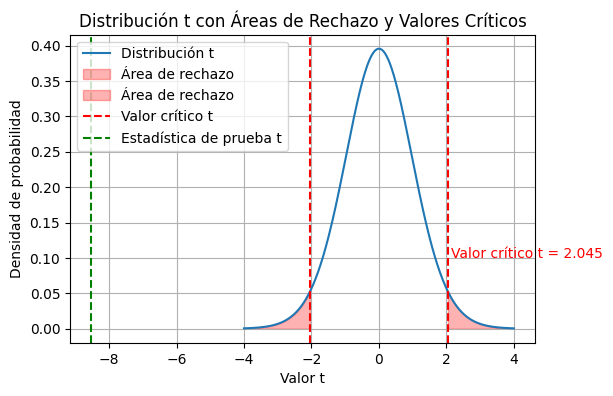

In [ ]:
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df=grados_libertad)

area_rechazo_x_left = np.linspace(-4, -valor_critico_t, 100)
area_rechazo_y_left = stats.t.pdf(area_rechazo_x_left, df=grados_libertad)

area_rechazo_x_right = np.linspace(valor_critico_t, 4, 100)
area_rechazo_y_right = stats.t.pdf(area_rechazo_x_right, df=grados_libertad)

# Crear la figura y los ejes
plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Distribución t')
plt.fill_between(area_rechazo_x_left, area_rechazo_y_left, color='red', alpha=0.3, label='Área de rechazo')
plt.fill_between(area_rechazo_x_right, area_rechazo_y_right, color='red', alpha=0.3, label='Área de rechazo')
plt.axvline(x=valor_critico_t, color='red', linestyle='--', label='Valor crítico t')
plt.axvline(x=-valor_critico_t, color='red', linestyle='--')
plt.axvline(x=t_statistic, color='green', linestyle='--', label='Estadística de prueba t')

plt.text(valor_critico_t + 0.1, 0.1, f'Valor crítico t = {valor_critico_t:.3f}', color='red')

plt.title('Distribución t con Áreas de Rechazo y Valores Críticos')
plt.xlabel('Valor t')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)

plt.show()